# Tempered Stable Subordinators

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpmath as mp
from mpmath import polylog
from mpmath import hyper
mp.dps = 20; mp.pretty = True
from scipy.special import gamma
from scipy.integrate import quad

In [240]:
def phi_X_1(u, a, b, c):

    if c > 0 and c < 1:
        # Case 0 < c < 1:
        result = mp.exp(a * gamma(-c) * ((u+b)**c - b**c))
    elif c == 0:
        # Case c = 0:
        result = mp.power(1 + u / b, -a)

    return result

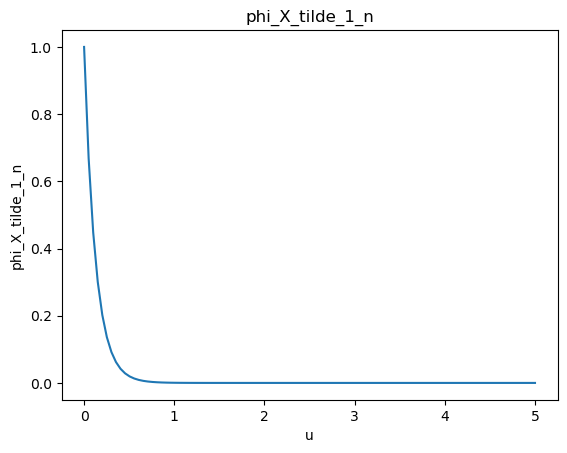

In [243]:
# Plot the function
u = np.linspace(0, 5, 100)
a = 2
b = 2
c = 0.8
n = 2

plt.plot(u, [phi_X_1(u_i, a, b, c) for u_i in u])
plt.xlabel("u")
plt.ylabel("phi_X_tilde_1_n")
plt.title("phi_X_tilde_1_n")
plt.show()

# Equation 29 (1)

In [223]:
def phi_X_tilde_1_n(u, a, b, c, n):

    # Check if the input values are valid
    if isinstance(u, complex):
        pass
    elif isinstance(u, (int, float)) and u > -b:
        pass
    else:
        raise ValueError("u must be a complex number or a real number greater than -b.")

    if c > 0:
        # Case c > 0
        hypergeom_term = hyper([1]*n + [-c], [2]*n, -u / b)
        result = mp.exp(a * b**c * gamma(-c) * (hypergeom_term - 1))
    elif c == 0:
        # Case c = 0
        part_1 = mp.exp(a * n)
        part_2 = mp.power(1 + (u/b), -a * ((b/u) + 1))
        polylog_sum = sum([polylog(j, -u/b) for j in range(2, n+1)])
        part_3 = mp.exp(((a*b) / u) * polylog_sum)
        result = part_1 * part_2 * part_3
    else:
        raise ValueError("c must be non-negative.")

    return result

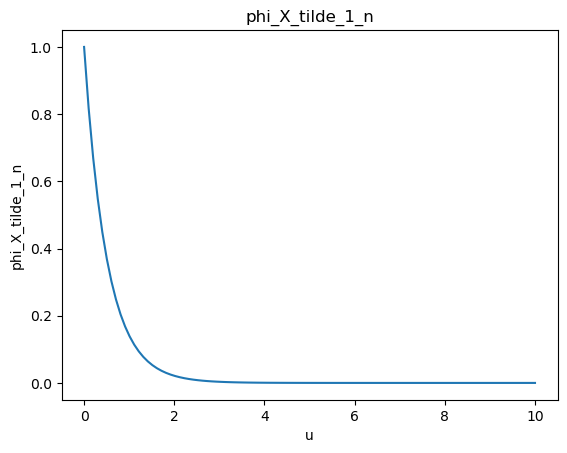

In [224]:
# Plot the function
u = np.linspace(0, 10, 100)
a = 2
b = 2
c = 0.8
n = 2

plt.plot(u, [phi_X_tilde_1_n(u_i, a, b, c, n) for u_i in u])
plt.xlabel("u")
plt.ylabel("phi_X_tilde_1_n")
plt.title("phi_X_tilde_1_n")
plt.show()

# Equation 29 (2)

In [225]:
def phi_X_breve_1_n(u, a, b, c, n):

    # Check if the input values are valid
    if isinstance(u, complex):
        pass
    elif isinstance(u, (int, float)) and u > -b * gamma(n+1):
        pass
    else:
        raise ValueError("u must be a complex number or a real number greater than -b*gamma(n+1).")


    if n <= 0:
        raise ValueError("n must be a positive.")
    
    if c > 0:
        # Case c > 0
        hypergeom_term = hyper([-c, 1/n], [(1/n) + 1], -u / (b * gamma(n+1)))
        result = mp.exp(a * b**c * gamma(-c) * (hypergeom_term - 1))
    elif c == 0:
        # Case c = 0:
        part_1 = mp.power(1 + u / (b * gamma(n+1)), -a)
        part_2 = hyper([1, 1/n + 1], [1/n + 2], -u / (b * gamma(n+1)))
        part_3 = mp.exp((a*n*n / b*gamma(n+2)) * part_2)
        result = part_1 * part_3
    else:
        raise ValueError("c must be non-negative.")

    return result # the result must be positive

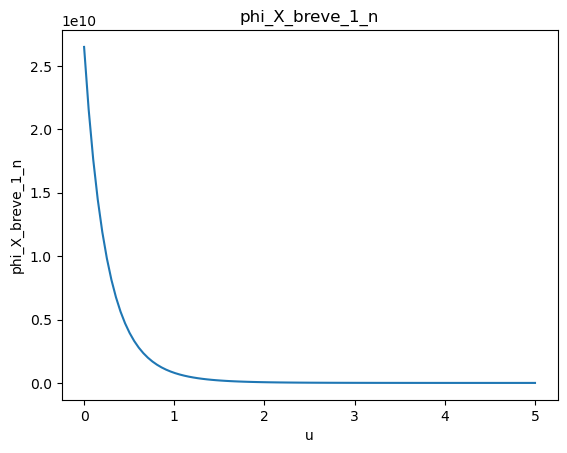

In [226]:
# Plot the function
u = np.linspace(0, 5, 100)
a = 2
b = 2
c = 0
n = 2

plt.plot(u, [phi_X_breve_1_n(u_i, a, b, c, n) for u_i in u])
plt.xlabel("u")
plt.ylabel("phi_X_breve_1_n")
plt.title("phi_X_breve_1_n")
plt.show()

# Equation 34

In [227]:
def density_function_f(x, a, b, c, n, t, mu, theta):

    if t <= 0:
        raise ValueError("t must be positive.")
    
    # Define the integrand
    def integrand(u):
        phase = mp.exp(1j * (mu*t - x) * u)
        phi_value = phi_X_breve_1_n(-1j * theta * u + (u**2 / 2), a, b, c, n)
        return np.real(phase * phi_value)
    
    # Calculate the integral
    integral = quad(integrand, 0, np.inf, limit=100)

    # Calculate the result
    result = (1 / np.pi) * integral[0]

    return result

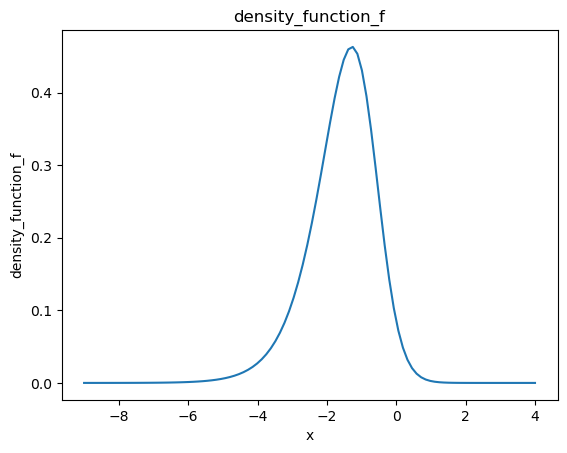

In [228]:
# Plot the function
x = np.linspace(-9, 4, 100)
a = 4.40503
b = 1.49887
c = 0.25
n = 2
t = 1
mu = -0.5
theta = -1.62404

plt.plot(x, [density_function_f(x_i, a, b, c, n, t, mu, theta) for x_i in x])
plt.xlabel("x")
plt.ylabel("density_function_f")
plt.title("density_function_f")
plt.show()

# Print the value of density function
print(density_function_f(-8, a, b, c, n, t, mu, theta))

In [244]:
# # Plot the function
# x = np.linspace(-9, 4, 100)
# a = 4.699191806989278
# b = 37.285759773533236
# c = 0.09746837212930462
# n = 4.84719881641692
# t = 1
# mu = -0.4745759456696377
# theta = 0.19968094260285518

# plt.plot(x, [density_function_f(x_i, a, b, c, n, t, mu, theta) for x_i in x])
# plt.xlabel("x")
# plt.ylabel("density_function_f")
# plt.title("density_function_f")
# plt.show()

# print(density_function_f(-6.831724347106357, a, b, c, n, t, mu, theta))

# Data Generation

In [232]:
# Generate the dataset with 7 columns and 10000 rows
# -10<x<4, 0<a<100, 0<b<100, 0<c<0.9, 0<n<5, t=1, -1<mu<1, -5<theta<5

n_rows = 15000

x = np.random.uniform(-10, 4, n_rows)
a = np.random.uniform(0, 100, n_rows)
b = np.random.uniform(0, 100, n_rows)
c = np.random.uniform(0, 0.9, n_rows)
n = np.random.uniform(0, 5, n_rows)
t = np.ones(n_rows)
mu = np.random.uniform(-1, 1, n_rows)
theta = np.random.uniform(-5, 5, n_rows)

data = np.column_stack((x, a, b, c, n, t, mu, theta))
data = pd.DataFrame(data, columns=['x', 'a', 'b', 'c', 'n', 't', 'mu', 'theta'])
print(data.head())

          x          a          b         c         n    t        mu     theta
0 -6.903502  96.288150   9.161045  0.414279  1.824137  1.0 -0.930881 -2.390048
1  3.792933  45.137374  23.736085  0.850192  3.510133  1.0 -0.501208  3.746167
2 -1.939105  53.391184  87.999907  0.545963  1.647899  1.0  0.073312 -2.690842
3 -1.453881  23.080517  34.249602  0.532162  3.822034  1.0 -0.449354 -2.086201
4 -0.686430  31.031181  50.078701  0.418351  2.344398  1.0 -0.001731 -3.745052


In [233]:
# Use the density_function_f to calculate the density values y
data['y'] = data.apply(lambda row: density_function_f(row['x'], row['a'], row['b'], row['c'], row['n'], row['t'], row['mu'], row['theta']), axis=1)
print(data.head())
print(data.shape)

C:\Users\Zhy20\AppData\Local\Temp\ipykernel_59932\649890880.py:13: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral = quad(integrand, 0, np.inf, limit=100)
C:\Users\Zhy20\AppData\Local\Temp\ipykernel_59932\649890880.py:13: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral = quad(integrand, 0, np.inf, limit=100)


          x          a          b         c         n    t        mu  \
0 -6.903502  96.288150   9.161045  0.414279  1.824137  1.0 -0.930881   
1  3.792933  45.137374  23.736085  0.850192  3.510133  1.0 -0.501208   
2 -1.939105  53.391184  87.999907  0.545963  1.647899  1.0  0.073312   
3 -1.453881  23.080517  34.249602  0.532162  3.822034  1.0 -0.449354   
4 -0.686430  31.031181  50.078701  0.418351  2.344398  1.0 -0.001731   

      theta         y  
0 -2.390048  0.000002  
1  3.746167  0.000013  
2 -2.690842  0.000097  
3 -2.086201  0.041552  
4 -3.745052  0.123527  
(15000, 9)


In [238]:
# Save the raw data
ata_raw = data.copy()

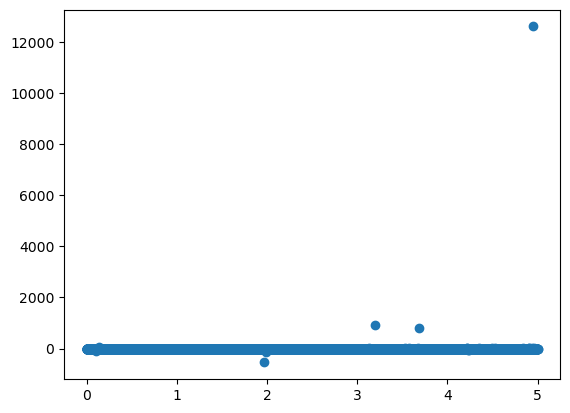

In [234]:
# Plot
plt.figure()
plt.plot(data['n'], data['y'], marker='o', linestyle='None')
plt.show()

In [235]:
# Remove all rows where y is negative
data = data[data['y'] > 0]
print(data.shape[0])

# Remove 100 largest y values from the dataset
for i in range(100):
    max_index = data['y'].idxmax()
    data = data.drop(max_index)

# Keep 100 rows
data = data.iloc[:10000]
print(data.shape[0])

11299
10000


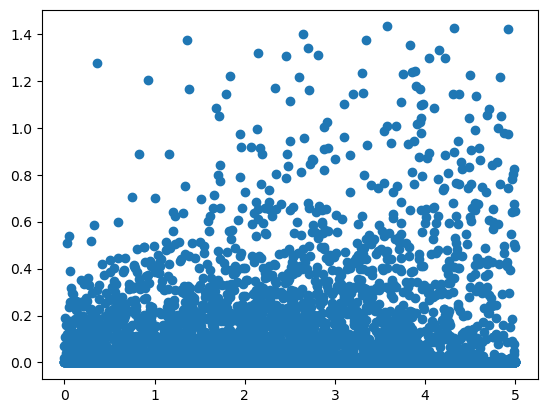

In [236]:
# Plot between n and y
plt.figure()
plt.plot(data['n'], data['y'], marker='o', linestyle='None')
plt.show()

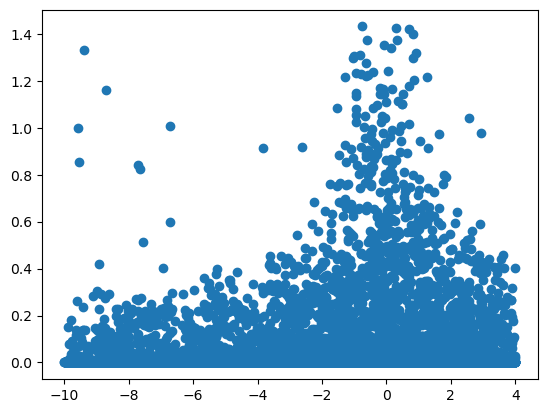

In [239]:
# Plot between x and y
plt.figure()
plt.plot(data['x'], data['y'], marker='o', linestyle='None')
plt.show()

In [237]:
# Save the dataset to a csv file in the datasets folder
data.to_csv('./datasets/generate_dataset.csv', index=False)

# Load the data
data = pd.read_csv('./datasets/generate_dataset.csv')
print(data.head())

          x          a          b         c         n    t        mu  \
0 -6.903502  96.288150   9.161045  0.414279  1.824137  1.0 -0.930881   
1  3.792933  45.137374  23.736085  0.850192  3.510133  1.0 -0.501208   
2 -1.939105  53.391184  87.999907  0.545963  1.647899  1.0  0.073312   
3 -1.453881  23.080517  34.249602  0.532162  3.822034  1.0 -0.449354   
4 -0.686430  31.031181  50.078701  0.418351  2.344398  1.0 -0.001731   

      theta         y  
0 -2.390048  0.000002  
1  3.746167  0.000013  
2 -2.690842  0.000097  
3 -2.086201  0.041552  
4 -3.745052  0.123527  
